In [9]:
!pip install tensorflow keras numpy
!pip install --upgrade keras numpy matplotlib

  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Using cached numpy-2.3.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.3.1-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.


In [10]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [11]:
keras.datasets.mnist.load_data(path="mnist.npz")

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

trainList = list(zip(y_train, x_train / 255))
testList = list(zip(y_test, x_test / 255))

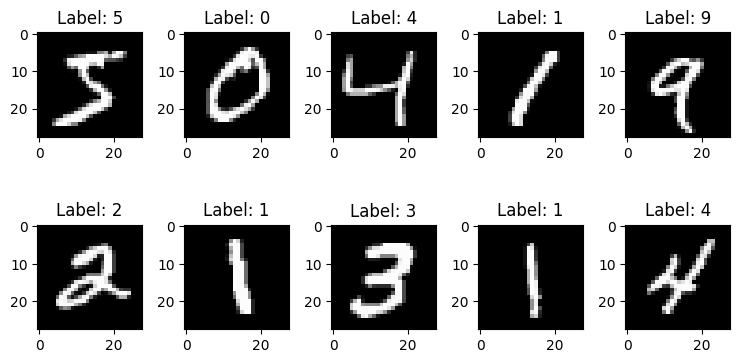

In [12]:
num = 10
images = x_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))

for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(trainList[i][1], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [1]:
# Initialize the 10 logistic models 

modelDict = {}
for i in range(10):
    modelDict[str(i)] = np.random.normal(0, 1, (28, 28))

NameError: name 'np' is not defined

In [18]:
# Defining any relevant functions
def logistic(x):
    return 1/(1 + np.exp(-1 * x))

# x: input vector, y: ground truth, theta: parameters
def gradient(x, y, theta):
    return (logistic(np.dot(theta.flatten(), x.flatten())) - y) * x

# BCE loss considering first 1000 examples
def trainLoss(modelDigit, testList):
    loss = 0
    randomTrainList = testList[:1000]
    random.shuffle(randomTrainList)
    
    for label, image in randomTrainList:
        yHat = model(image, modelDict[str(modelDigit)])
        y = oneHotEncoding(modelDigit, label)

        loss += -1 * (y * np.log(yHat) + (1 - y) * np.log(1 - yHat))
    
    return loss

# Makes a prediction
def model(x, theta):
    return logistic(np.dot(theta.flatten(), x.flatten()))
                
def oneHotEncoding(digit, label):
    return (1 if int(digit) == int(label) else 0)

pastLosses = {}
for i in range(10):
    pastLosses[i] = []

# Function to train each model individually
def train(modelDigit, tranList, epochs, a):
    iteration = 0;

    for i in range(epochs):
        for label, image in trainList:
            iteration += 1
            modelDict[str(modelDigit)] -= a * gradient(image, oneHotEncoding(modelDigit, label), modelDict[str(modelDigit)])

            if iteration % 100 == 0:
                loss = trainLoss(modelDigit, testList)
                pastLosses[modelDigit].append(loss)
                

In [19]:
train(0, trainList, 10, 0.0025)
train(1, trainList, 10, 0.0025)
train(2, trainList, 10, 0.0025)
train(3, trainList, 10, 0.0025)
train(4, trainList, 10, 0.0025)
train(5, trainList, 10, 0.0025)
train(6, trainList, 10, 0.0025)
train(7, trainList, 10, 0.0025)
train(8, trainList, 10, 0.0025)
train(9, trainList, 10, 0.0025)

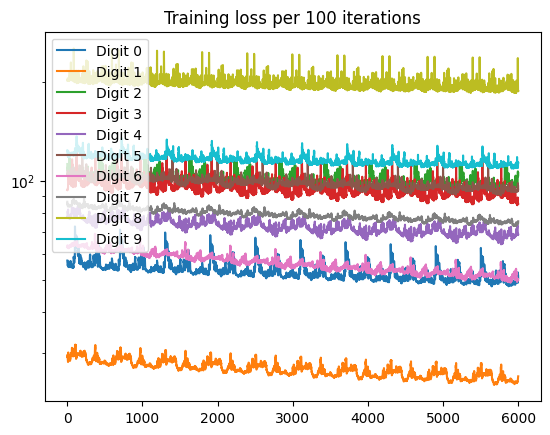

In [20]:
# Plotting Loss
xRange = [x for x in range(len(pastLosses[0]))]

for i in range(10):
    plt.plot(xRange, pastLosses[i], label="Digit " + str(i))

plt.title("Training loss per 100 iterations")
plt.yscale("log")
plt.legend(loc="upper left")

plt.show()

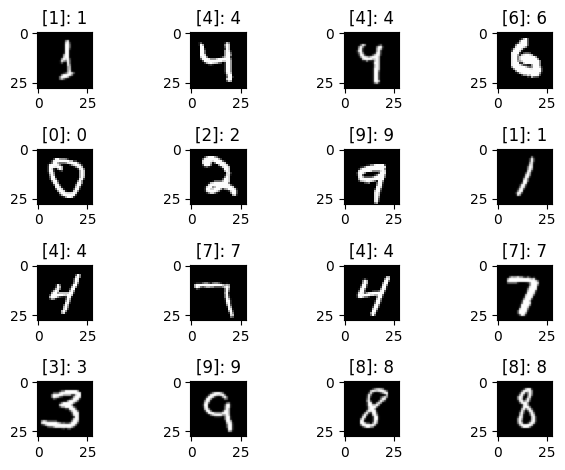

In [21]:
rows = 4
cols = 4

examples = []
labels = []

for i in range(rows * cols):
    labels.append("[" + str(testList[900 + i][0]) + "]: ")
    examples.append(testList[900 + i][1])

for i in range(rows * cols):
    responseVector = []
    for j in range(10):
        responseVector.append(model(examples[i], modelDict[str(j)]))

    modelPrediction = str(responseVector.index(max(responseVector)))
    labels[i] += modelPrediction

figure, ax = plt.subplots(rows,cols)
for idx, img in enumerate(examples):
    ax.ravel()[idx].imshow(img, cmap=plt.get_cmap('gray'))
    ax.ravel()[idx].set_title(labels[idx])

plt.tight_layout()
plt.show()